In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Multivariate with dummy variable

In [2]:
carseat = pd.read_csv('C:/Users/user/Desktop/file/ISL/carseats.csv',index_col=0)
carseat

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
carseat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(carseat[['Urban']].values)
urban = encoder.transform(carseat[['Urban']].values)
encoder.fit(carseat[['US']].values)
us = encoder.transform(carseat[['US']].values)

In [36]:
X = carseat.loc[:,['CompPrice','Income','Advertising','Population','Price']]

X_enc = pd.DataFrame({'Urban':urban, 'US':us})
X_enc.index = X.index
X = pd.concat([X, X_enc], axis=1)
Y = carseat.loc[:,['Sales']]

In [57]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,Y,test_size=0.3, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=7)
X_train.shape

(224, 7)

### Neural network model

In [140]:
model_ = keras.models.Sequential()
model_.add(keras.layers.Dense(30, input_dim=7, activation = 'relu'))
model_.add(keras.layers.Dense(30, activation = 'selu'))
model_.add(keras.layers.Dense(1))
model_.compile(loss = 'mean_squared_error',
               optimizer = keras.optimizers.SGD(lr=0.00001))

fit = model_.fit(X_train, y_train,
                batch_size = 4,
               epochs=30,
               validation_data=(X_valid, y_valid),verbose=0)

In [141]:
history = pd.DataFrame(fit.history)
print(history.head())
history.tail()

         loss   val_loss
0  257.814606  14.768027
1   14.864804  13.624420
2   13.451625  10.678241
3   11.927470   9.536338
4   10.752397   8.259877


,loss,val_loss
25,5.286260,6.307616
26,5.472590,6.532635
27,5.307317,5.558745
28,5.082463,5.881116
29,5.476327,5.628280


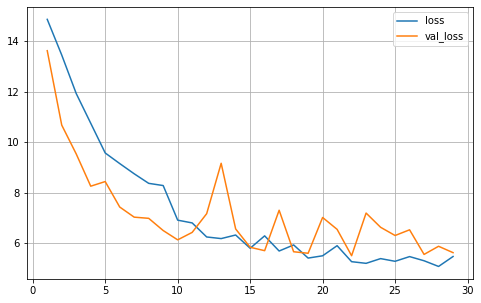

In [142]:
history.loc[1:,:].plot(figsize=(8,5))
plt.grid(True)

In [143]:
model_.evaluate(X_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 4.8843


4.884277820587158

### Wide and deep

In [144]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'selu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model0 = keras.models.Model(inputs=[input_], outputs=[output])

model0.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.00001))
fit = model0.fit(X_train, y_train, batch_size=4, epochs=30,
               validation_data=(X_valid, y_valid), verbose=0)

hist = pd.DataFrame(fit.history)
print(hist.head())
hist.tail()

   loss  val_loss
0   NaN       NaN
1   NaN       NaN
2   NaN       NaN
3   NaN       NaN
4   NaN       NaN


,loss,val_loss
25,NaN,NaN
26,NaN,NaN
27,NaN,NaN
28,NaN,NaN
29,NaN,NaN


In [145]:
model0.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: nan


nan

### 입력층 2개

In [146]:
input_A = keras.layers.Input(shape=[2], name="wide_input") 
input_B = keras.layers.Input(shape=[5], name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='selu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [147]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.00001))

X_train_A, X_train_B = X_train[['Urban','US']], X_train[['CompPrice','Income','Advertising','Population','Price']]
X_valid_A, X_valid_B = X_valid[['Urban','US']], X_valid[['CompPrice','Income','Advertising','Population','Price']]
X_test_A, X_test_B = X_test[['Urban','US']], X_test[['CompPrice','Income','Advertising','Population','Price']]

fit = model.fit((X_train_A, X_train_B), y_train, batch_size=4,epochs=30,
                validation_data=([X_valid_A, X_valid_B], y_valid), verbose=0)

In [148]:
hist = pd.DataFrame(fit.history)
print(hist.head())
hist.tail()

         loss   val_loss
0  533.454407  12.171309
1   11.815732   8.976343
2    9.436462   7.306861
3    8.343543   7.504177
4    7.776577   6.316465


,loss,val_loss
25,4.994766,6.006649
26,5.007440,6.103728
27,4.991608,5.986660
28,4.779984,5.939912
29,4.758407,6.051064


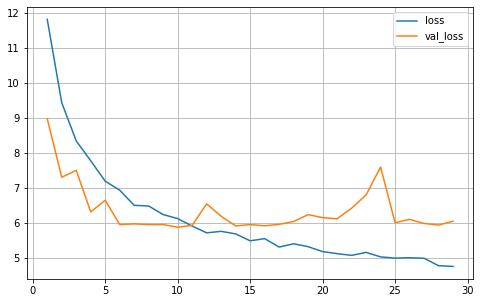

In [150]:
hist.loc[1:,:].plot(figsize=(8,5))
plt.grid(True)

In [151]:
model.evaluate([X_test_A,X_test_B],y_test)

4/4 [==============================] - 0s 2ms/step - loss: 4.8862


4.886221885681152

In [171]:
input_A = keras.layers.Input(shape=[3], name="wide_input") 
input_B = keras.layers.Input(shape=[4], name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='selu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model2 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model2.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.00001))

X_train_A, X_train_B = X_train[['Price','Urban','US']], X_train[['CompPrice','Income','Advertising','Population']]
X_valid_A, X_valid_B = X_valid[['Price','Urban','US']], X_valid[['CompPrice','Income','Advertising','Population']]
X_test_A, X_test_B = X_test[['Price','Urban','US']], X_test[['CompPrice','Income','Advertising','Population']]

fit = model2.fit((X_train_A, X_train_B), y_train, batch_size=4,epochs=30,
                validation_data=([X_valid_A, X_valid_B], y_valid), verbose=0)

hist = pd.DataFrame(fit.history)
print(hist.head())
hist.tail()

         loss   val_loss
0  508.853302  10.189842
1    9.893403   7.282559
2    7.320109  14.088328
3    6.306964  12.077077
4    6.534670   5.448638


,loss,val_loss
25,4.977370,4.874589
26,4.950294,4.836999
27,4.803342,6.078113
28,4.842113,6.082761
29,4.723963,5.125590


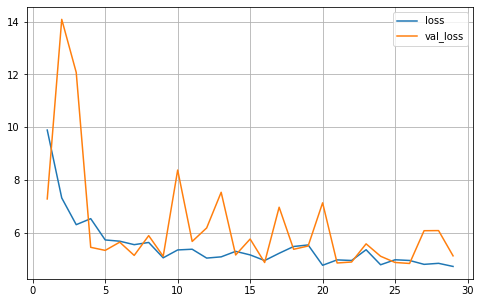

In [174]:
hist.loc[1:,:].plot(figsize=(8,5))
plt.grid(True)

In [175]:
model2.evaluate([X_test_A,X_test_B],y_test)

4/4 [==============================] - 0s 2ms/step - loss: 4.5386


4.53864049911499

In [176]:
input_A = keras.layers.Input(shape=[1], name="wide_input") 
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='selu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model3 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model3.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.00001))

X_train_A, X_train_B = X_train[['Urban']], X_train[['CompPrice','Income','Advertising','Population','Price','US']]
X_valid_A, X_valid_B = X_valid[['Urban']], X_valid[['CompPrice','Income','Advertising','Population','Price','US']]
X_test_A, X_test_B = X_test[['Urban']], X_test[['CompPrice','Income','Advertising','Population','Price','US']]

fit = model3.fit((X_train_A, X_train_B), y_train, batch_size=4,epochs=30,
                validation_data=([X_valid_A, X_valid_B], y_valid), verbose=0)

hist = pd.DataFrame(fit.history)
print(hist.head())
hist.tail()

          loss  val_loss
0  3321.553223  6.823934
1     9.059747  6.622180
2     8.649873  7.397695
3     8.147721  6.448991
4     8.677832  6.317480


,loss,val_loss
25,7.131909,6.201875
26,7.305779,5.824287
27,7.259639,5.593054
28,7.121708,5.527968
29,7.024605,5.514805


In [177]:
model3.evaluate([X_test_A,X_test_B],y_test)

4/4 [==============================] - 0s 2ms/step - loss: 6.6997


6.699653625488281